In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Dense, Activation, Flatten, Convolution2D, Dropout
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import shutil
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\train.csv')
test = pd.read_csv(r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\test.csv')


# Concatenate train and test data for consistent processing
combined_data = pd.concat([train, test], ignore_index=True)

# Preparing classes for labeling
traindata = combined_data[['id','species']].copy()
traindata['id'] = traindata['id'].astype(str)
traindata['label'] = LabelEncoder().fit_transform(traindata['species'])


# Loading Images and Linking Labels
images = r'C:\Users\rana ahmed\Desktop\Senior_2\deepLearingproject\Leaf-Classification\leaf-classification\images'

# List comprehension to load images and link labels
imgs = [Image.open(os.path.join(images, i)).convert('1') 
        for i in sorted(os.listdir(images)) 
        if i.split('.')[0] in traindata['id'].values]

# Matching labels using list comprehension
labels = [traindata[traindata['id'] == i.split('.')[0]]['label'].values[0] 
          for i in sorted(os.listdir(images)) 
          if i.split('.')[0] in traindata['id'].values]

# Displaying information
print(f"We have {len(imgs)} images in the dataset")
print(f"Dataset have {len(np.unique(labels))} labels ")

We have 1584 images in the dataset
Dataset have 100 labels 


In [3]:
def load_images_as_arrays(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Filter by file extensions
            img = Image.open(os.path.join(directory, filename))
            img_array = np.array(img)
            images.append(img_array)
    return images

images_as_array = load_images_as_arrays(images)
print(len(images_as_array))  # Check the number of loaded images
print(images_as_array)

1584
[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0,

In [4]:
labels_np = np.array(labels)
labels_np

array([ 3, 54, 20, ..., 99, 99, 53])

In [5]:
def resize_images_and_greyscale(images_array, new_size):
    resized_images = []
    for img in images_array:
        pil_img = Image.fromarray(img)
        # Resize
        resized_img = pil_img.resize(new_size)
        # Convert to grayscale
        grayscale_img = resized_img.convert('L')
        resized_images.append(np.array(grayscale_img))
    return resized_images

# Resize images in the array to a new size (e.g., (64, 64)) and convert to greyscale
resized_images = resize_images_and_greyscale(images_as_array, (64, 64))

# Check the shape of the resized and grayscale images
print("Shape of the first image:", resized_images[0].shape)

Shape of the first image: (64, 64)


In [6]:
resized_images = np.expand_dims(resized_images, axis=-1)
print("Shape of the first image:", resized_images[0].shape)

Shape of the first image: (64, 64, 1)


In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(resized_images, labels, test_size=0.2, random_state=42,stratify=labels)
X_train,X_val,Y_train,Y_val= train_test_split(X_train, Y_train, test_size=0.2, random_state=42,stratify=Y_train)

print(f"Data have {len(X_train)} images for training")
print(f"Data have {len(X_test)} images for testing")
print(f"Data have {len(X_val)} images for validatio")
print(f"Training data consist of  {len(np.unique(Y_train))} classes ")
print(f"Testing data consist of {len(np.unique(Y_test))} classes")
print(f"Validating data consist of {len(np.unique(Y_val))} classes")

Data have 1013 images for training
Data have 317 images for testing
Data have 254 images for validatio
Training data consist of  100 classes 
Testing data consist of 100 classes
Validating data consist of 100 classes


In [10]:
Y_train[0].shape

()

In [11]:
# Then, create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
validation_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

print(f"length of train dataset is {len(train_dataset)}")
print(f"length of validation dataset is {len(validation_dataset)}")
print(f"length of Testing dataset is {len(test_dataset)}")

length of train dataset is 1013
length of validation dataset is 254
length of Testing dataset is 317


In [12]:
# Batch and shuffle the datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
validation_dataset = validation_dataset.shuffle(len(X_val)).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

print(f"length of train dataset is {len(train_dataset)}")
print(f"length of validation dataset is {len(validation_dataset)}")
print(f"length of Testing dataset is {len(test_dataset)}")

length of train dataset is 32
length of validation dataset is 8
length of Testing dataset is 10


In [20]:
# Define the CNN model using Keras Functional API
Model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)), 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(100, activation='softmax')
])

In [21]:
Model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 128)       

In [23]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers


def train_model(Train_dataset,Validation_dataset, batch_size, optimizer, learning_rate, weight_decay,num_epochs):

    Model1
    if optimizer == 'SGD':
        optimizer = SGD(learning_rate=learning_rate, decay=weight_decay)
    elif optimizer == 'Adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer == 'RMSprop':
        optimizer = RMSprop(learning_rate=learning_rate, decay=weight_decay)

    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
    Model1.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

    #def scheduler(epoch, lr):
    #    return lr * tf.math.exp(-0.1)

   # lr_scheduler = LearningRateScheduler(scheduler)

    history = Model1.fit(Train_dataset, epochs=num_epochs,validation_data=Validation_dataset, batch_size=batch_size)
        #print(f"{len(Train_dataset)} [{batch_size}]: loss: {history.history['loss'][0]:.4f} - accuracy: {history.history['accuracy'][0]:.4f} - val_loss: {history.history['val_loss'][0]:.4f} - val_accuracy: {history.history['val_accuracy'][0]:.4f}")

    return history

In [25]:
print('Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001')

trial1 = train_model(train_dataset,validation_dataset,32,'Adam',0.001,0.001,60)

Result for adam optimizer,learning_rate=0.001,epoch =30, weight_decay =0.001
Epoch 1/60


32/32 [==============================] - 4s 117ms/step - loss: 1.9062 - accuracy: 0.4630 - val_loss: 3.7342 - val_accuracy: 0.3740
Epoch 2/60
32/32 [==============================] - 3s 103ms/step - loss: 1.8312 - accuracy: 0.4600 - val_loss: 3.2117 - val_accuracy: 0.3976
Epoch 3/60
32/32 [==============================] - 3s 103ms/step - loss: 1.7869 - accuracy: 0.4906 - val_loss: 3.3610 - val_accuracy: 0.3780
Epoch 4/60
32/32 [==============================] - 3s 98ms/step - loss: 1.7361 - accuracy: 0.4886 - val_loss: 3.5428 - val_accuracy: 0.3780
Epoch 5/60
32/32 [==============================] - 3s 99ms/step - loss: 1.7144 - accuracy: 0.4926 - val_loss: 3.4357 - val_accuracy: 0.3858
Epoch 6/60
32/32 [==============================] - 3s 100ms/step - loss: 1.7072 - accuracy: 0.4886 - val_loss: 3.7595 - val_accuracy: 0.3819
Epoch 7/60
32/32 [==============================] - 3s 98ms/step - loss: 1.6317 - accuracy: 0.5074 - val_loss: 3.2913 - val_accuracy: 0.3701
Epoch 8/60
32/32 [==

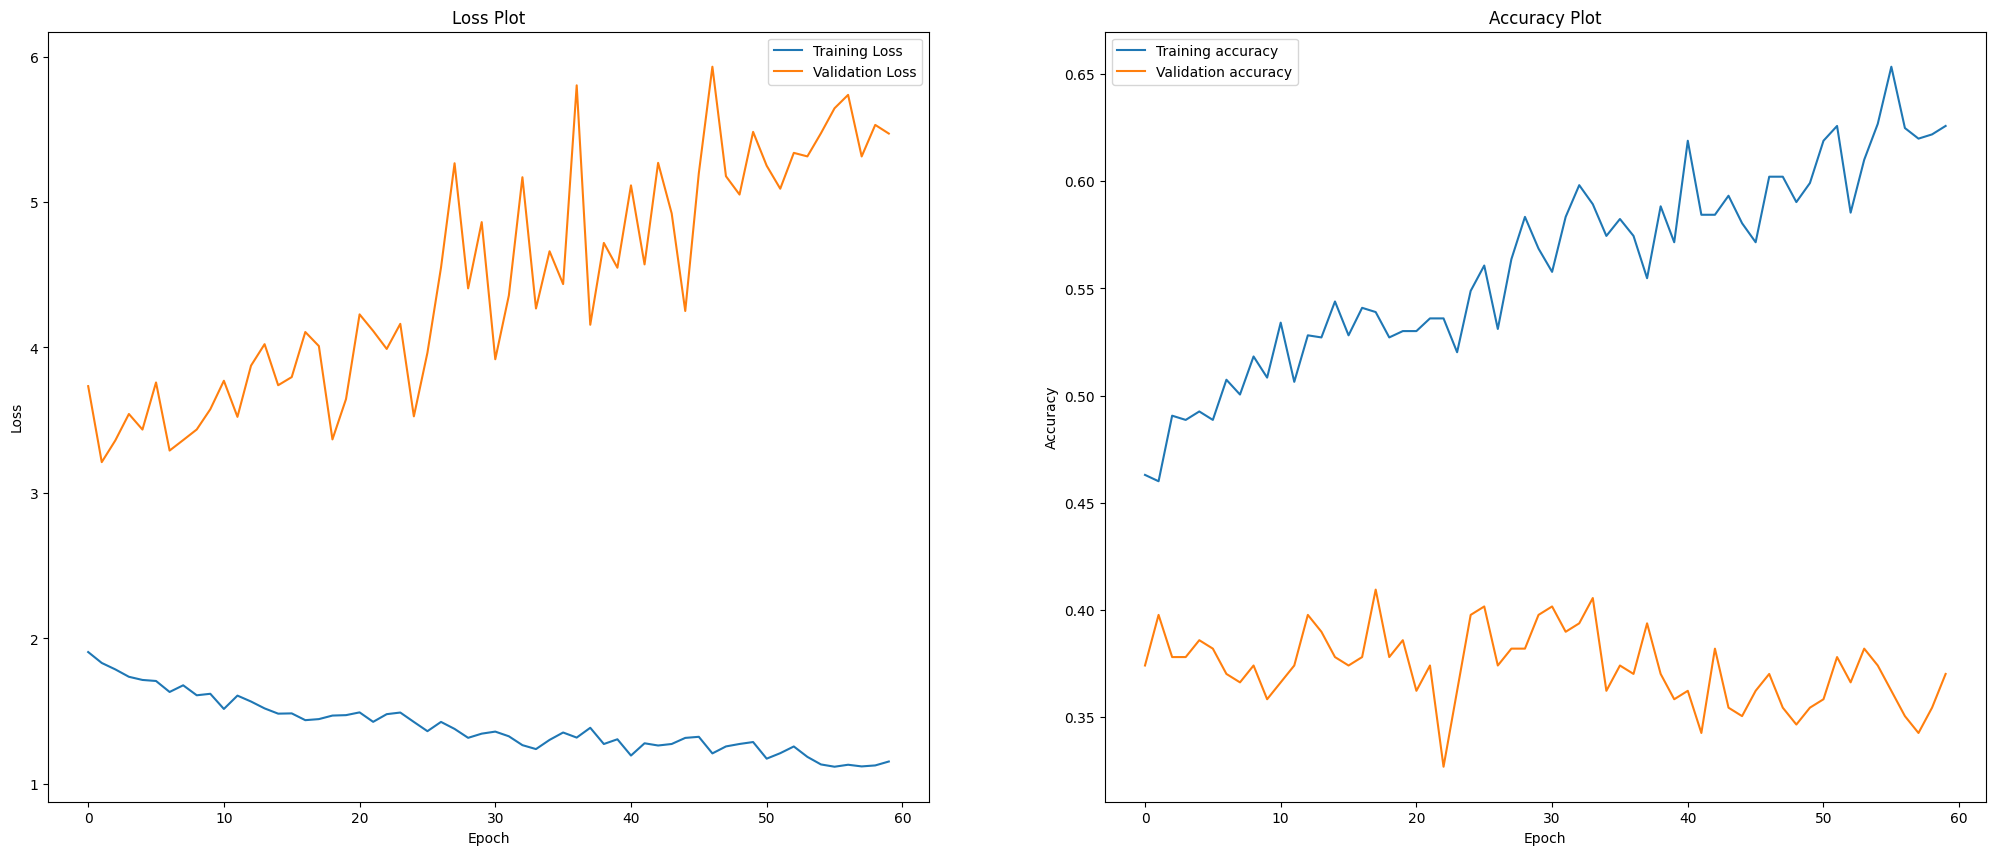

In [26]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(trial1.history["loss"],label="Training Loss")
ax[0].plot(trial1.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Plot")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].legend()

ax[1].plot(trial1.history["accuracy"],label="Training accuracy")
ax[1].plot(trial1.history["val_accuracy"],label="Validation accuracy")
ax[1].set_title("Accuracy Plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()

plt.show()

In [27]:
def test_results(model, testing_data):

    test_loss, test_acc = model.evaluate(testing_data, verbose=2)
    print('Test loss: {loss:.2f}'.format(loss=test_loss))
    print('Test accuracy: {acc:.2f}%'.format(acc=test_acc*100))
    return

test_results(Model1,test_dataset)

10/10 - 0s - loss: 4.7738 - accuracy: 0.3722 - 215ms/epoch - 22ms/step
Test loss: 4.77
Test accuracy: 37.22%
